In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,mean_squared_error
import matplotlib.pyplot as plt

# Trees for Classification

In [2]:
data=pd.read_csv("C:\\R DATA SETS\\BreastCancer.csv")
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
x=data.iloc[:,:9].values
y=data.iloc[:,9].values

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

# Decision Tree Classification

In [5]:
clt=DecisionTreeClassifier()
clt.fit(x_train,y_train)

DecisionTreeClassifier()

# Visualization

[Text(0.5131578947368421, 0.9375, 'Glucose <= 96.5\ngini = 0.497\nsamples = 69\nvalue = [32, 37]\nclass = 2'),
 Text(0.2631578947368421, 0.8125, 'HOMA <= 2.057\ngini = 0.411\nsamples = 38\nvalue = [27, 11]\nclass = 1'),
 Text(0.15789473684210525, 0.6875, 'Resistin <= 25.035\ngini = 0.32\nsamples = 30\nvalue = [24, 6]\nclass = 1'),
 Text(0.10526315789473684, 0.5625, 'BMI <= 20.475\ngini = 0.245\nsamples = 28\nvalue = [24, 4]\nclass = 1'),
 Text(0.05263157894736842, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 2'),
 Text(0.15789473684210525, 0.4375, 'Resistin <= 3.281\ngini = 0.142\nsamples = 26\nvalue = [24, 2]\nclass = 1'),
 Text(0.10526315789473684, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 2'),
 Text(0.21052631578947367, 0.3125, 'Resistin <= 13.066\ngini = 0.077\nsamples = 25\nvalue = [24, 1]\nclass = 1'),
 Text(0.15789473684210525, 0.1875, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = 1'),
 Text(0.2631578947368421, 0.1875, 'Resistin <= 15.639\ngini

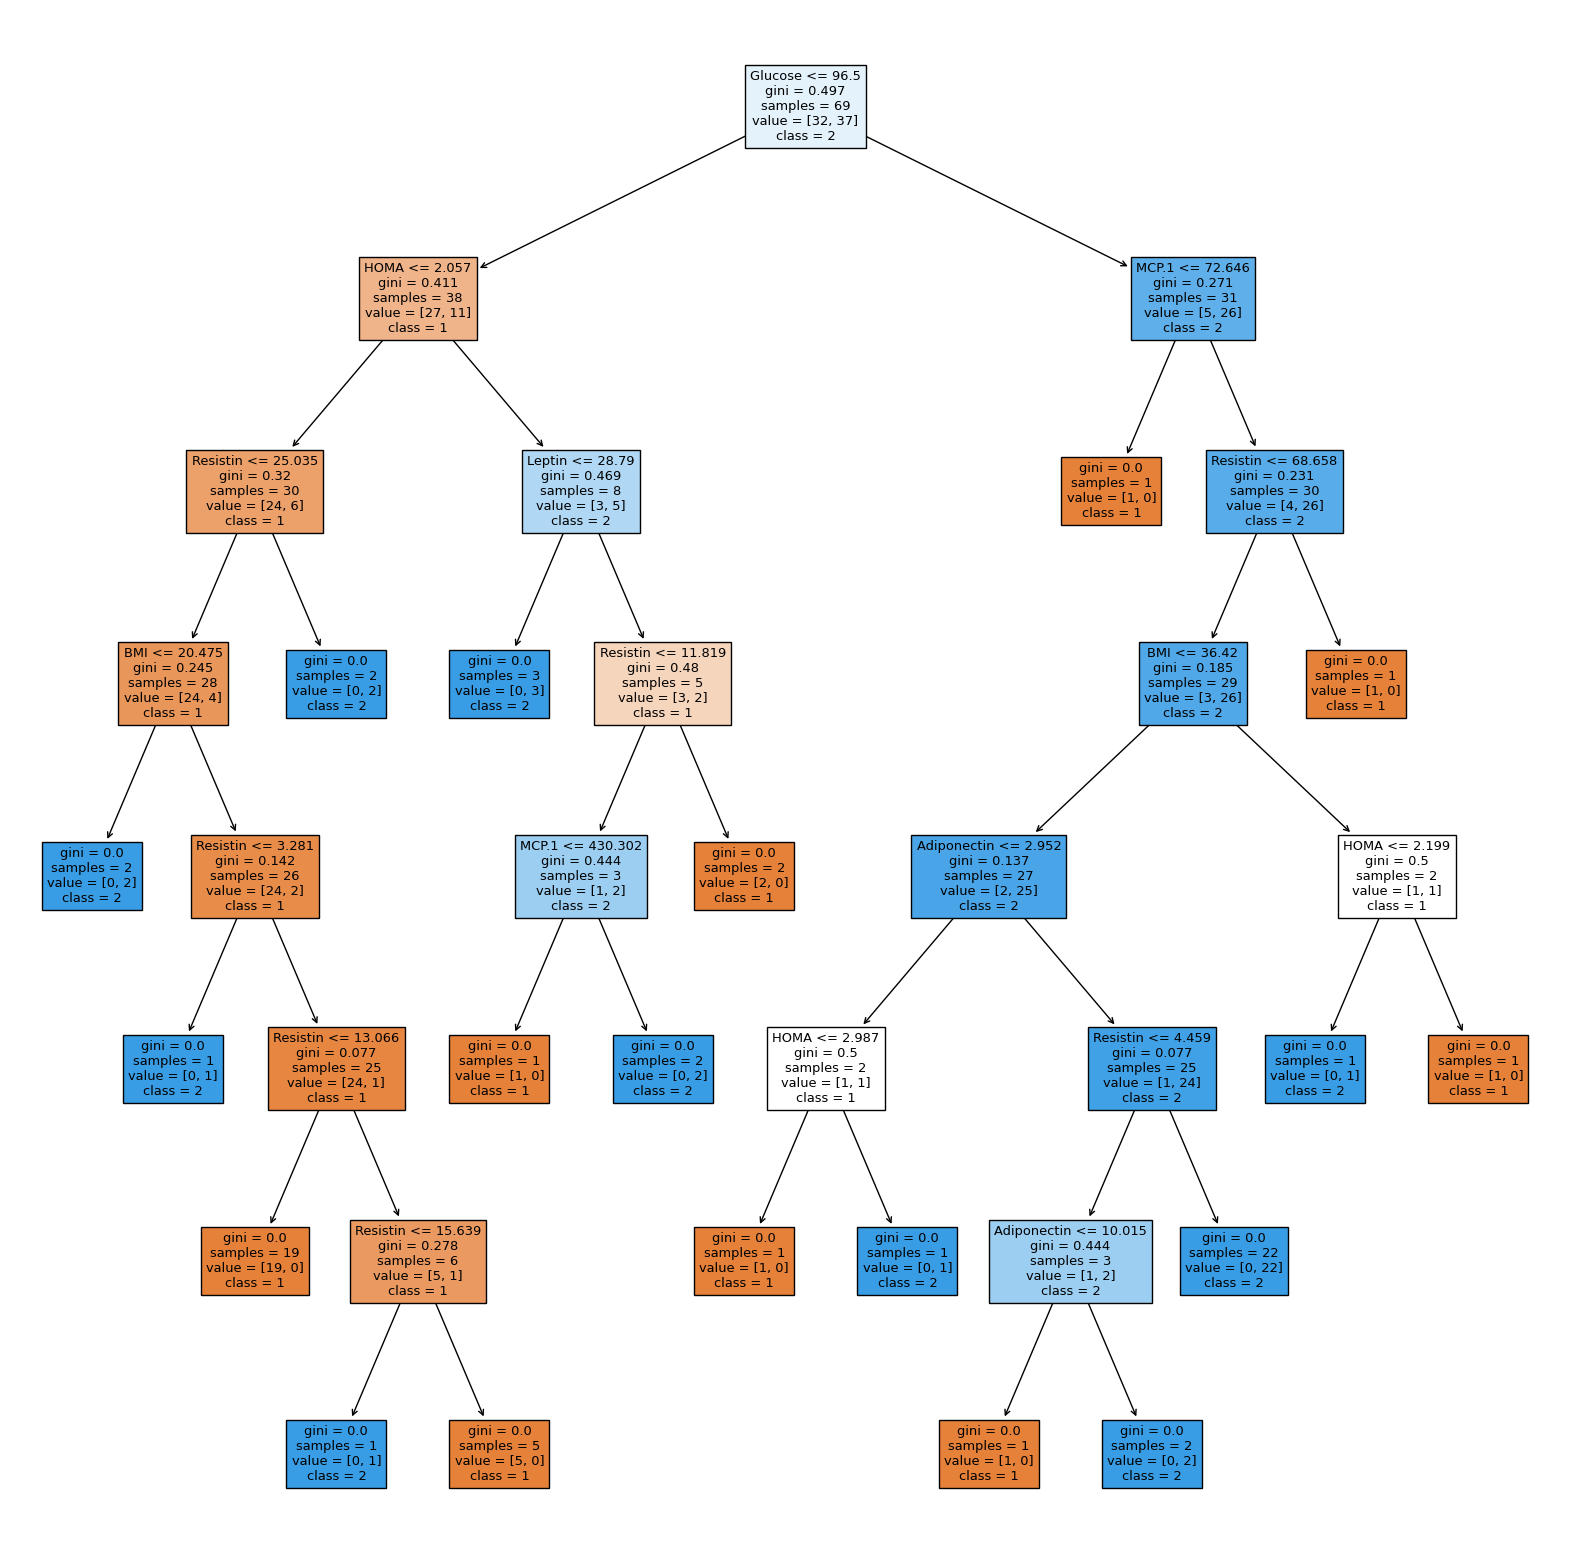

In [6]:
plt.figure(figsize=(20,20))
plot_tree(clt,feature_names=data.columns,class_names=["1","2"],filled=True)

# Predictions and accuracy

In [7]:
y_pred=clt.predict(x_test)

In [8]:
accuracy_score(y_test,y_pred)

0.6382978723404256

In [9]:
confusion_matrix(y_test,y_pred)

array([[14,  6],
       [11, 16]], dtype=int64)

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.56      0.70      0.62        20
           2       0.73      0.59      0.65        27

    accuracy                           0.64        47
   macro avg       0.64      0.65      0.64        47
weighted avg       0.66      0.64      0.64        47



# Pruning

In [11]:
cltp=DecisionTreeClassifier(max_depth=3)
cltp.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

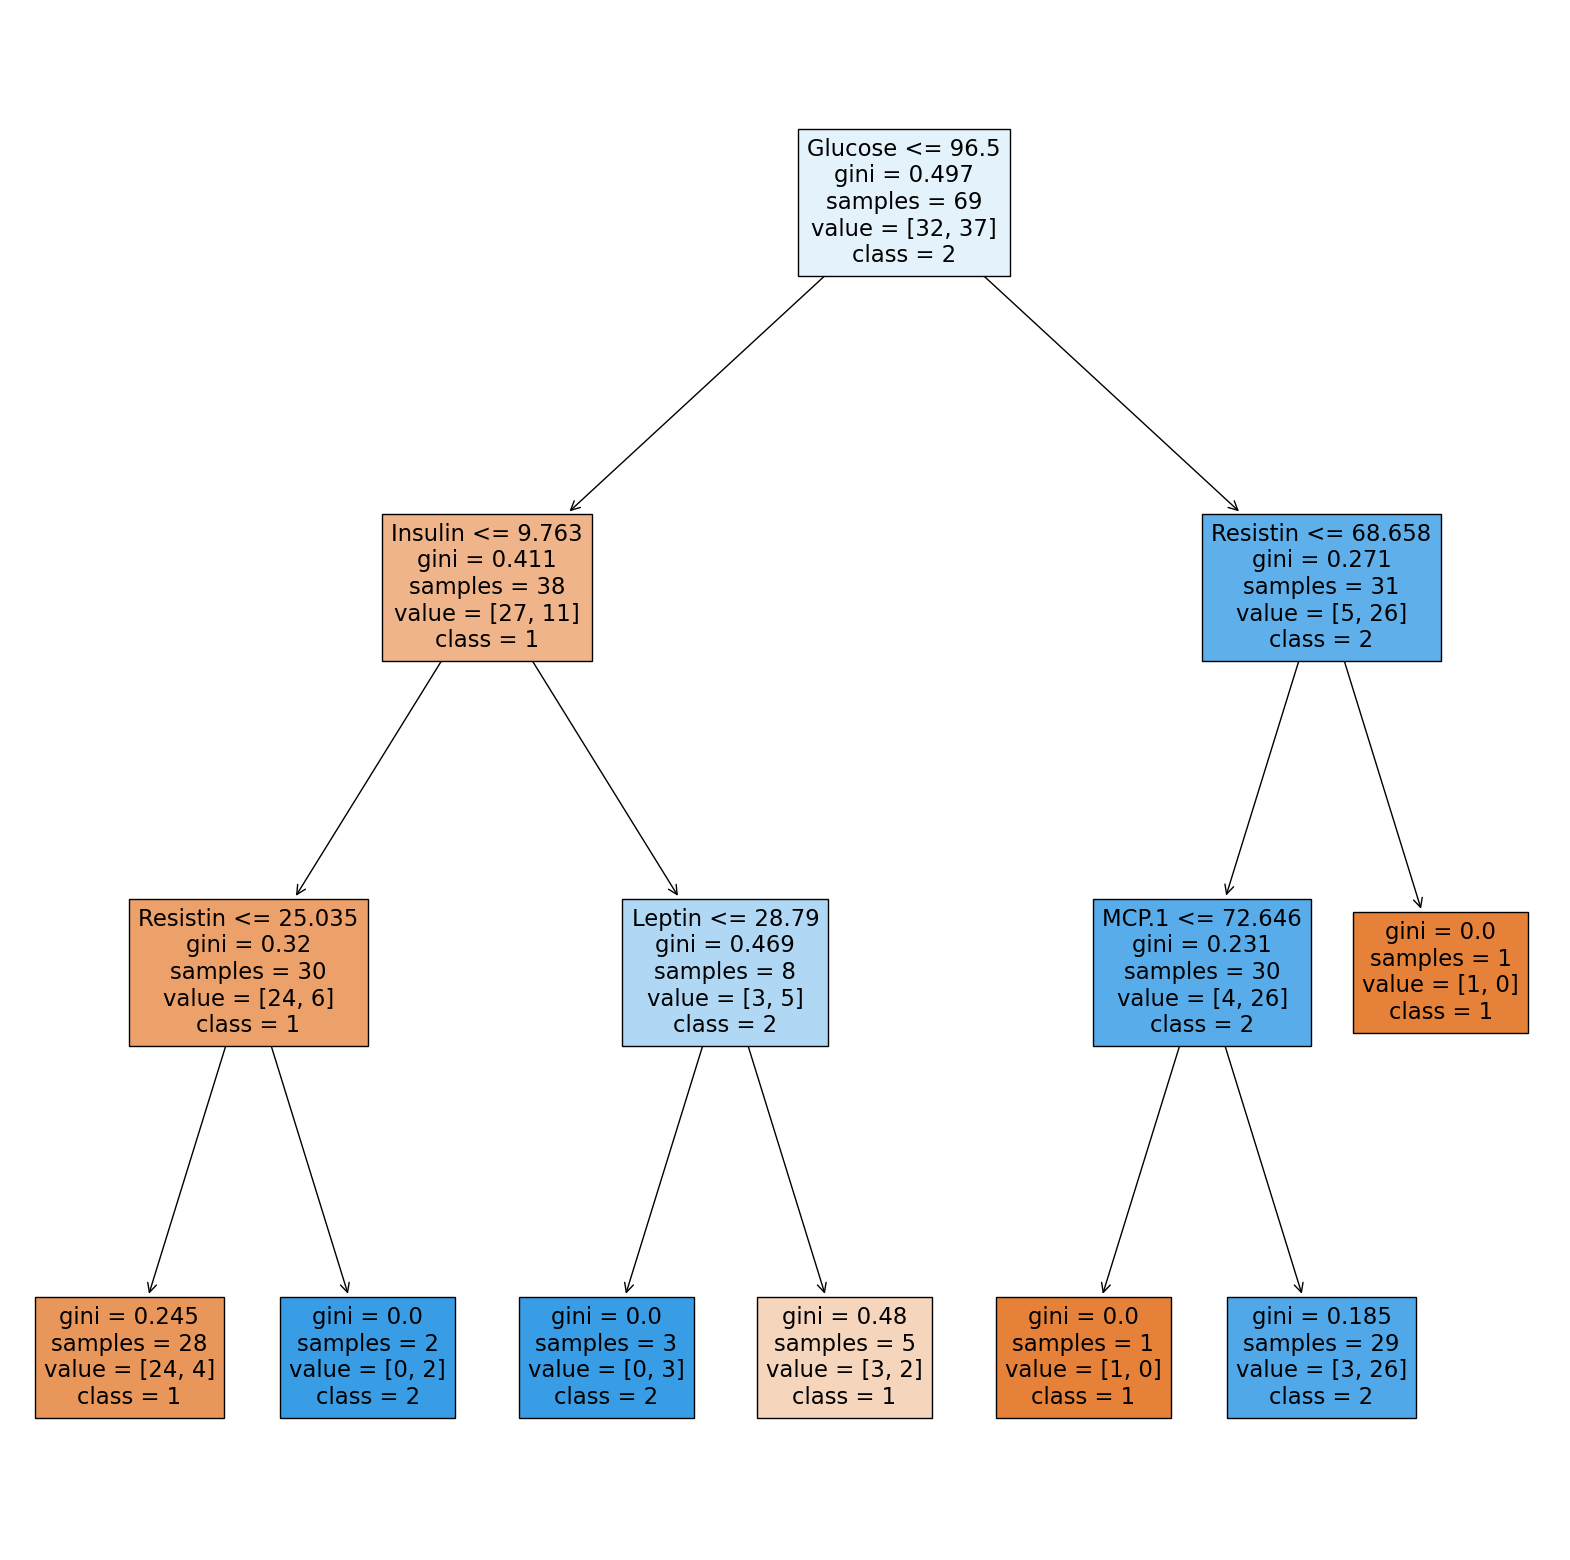

In [13]:
plt.figure(figsize=(20,20))
plot_tree(cltp,feature_names=data.columns,class_names=["1","2"],filled=True)
plt.show()

In [14]:
y_pred=cltp.predict(x_test)
accuracy_score(y_test,y_pred)

0.6382978723404256

# Tress for Regression

In [15]:
data=pd.read_csv("C:\\R DATA SETS\\Boston.CSV")
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
x=data.iloc[:,:12].values
y=data.iloc[:,12].values

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Decision Tree Regression

In [18]:
rgt=DecisionTreeRegressor(max_depth=3)
rgt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

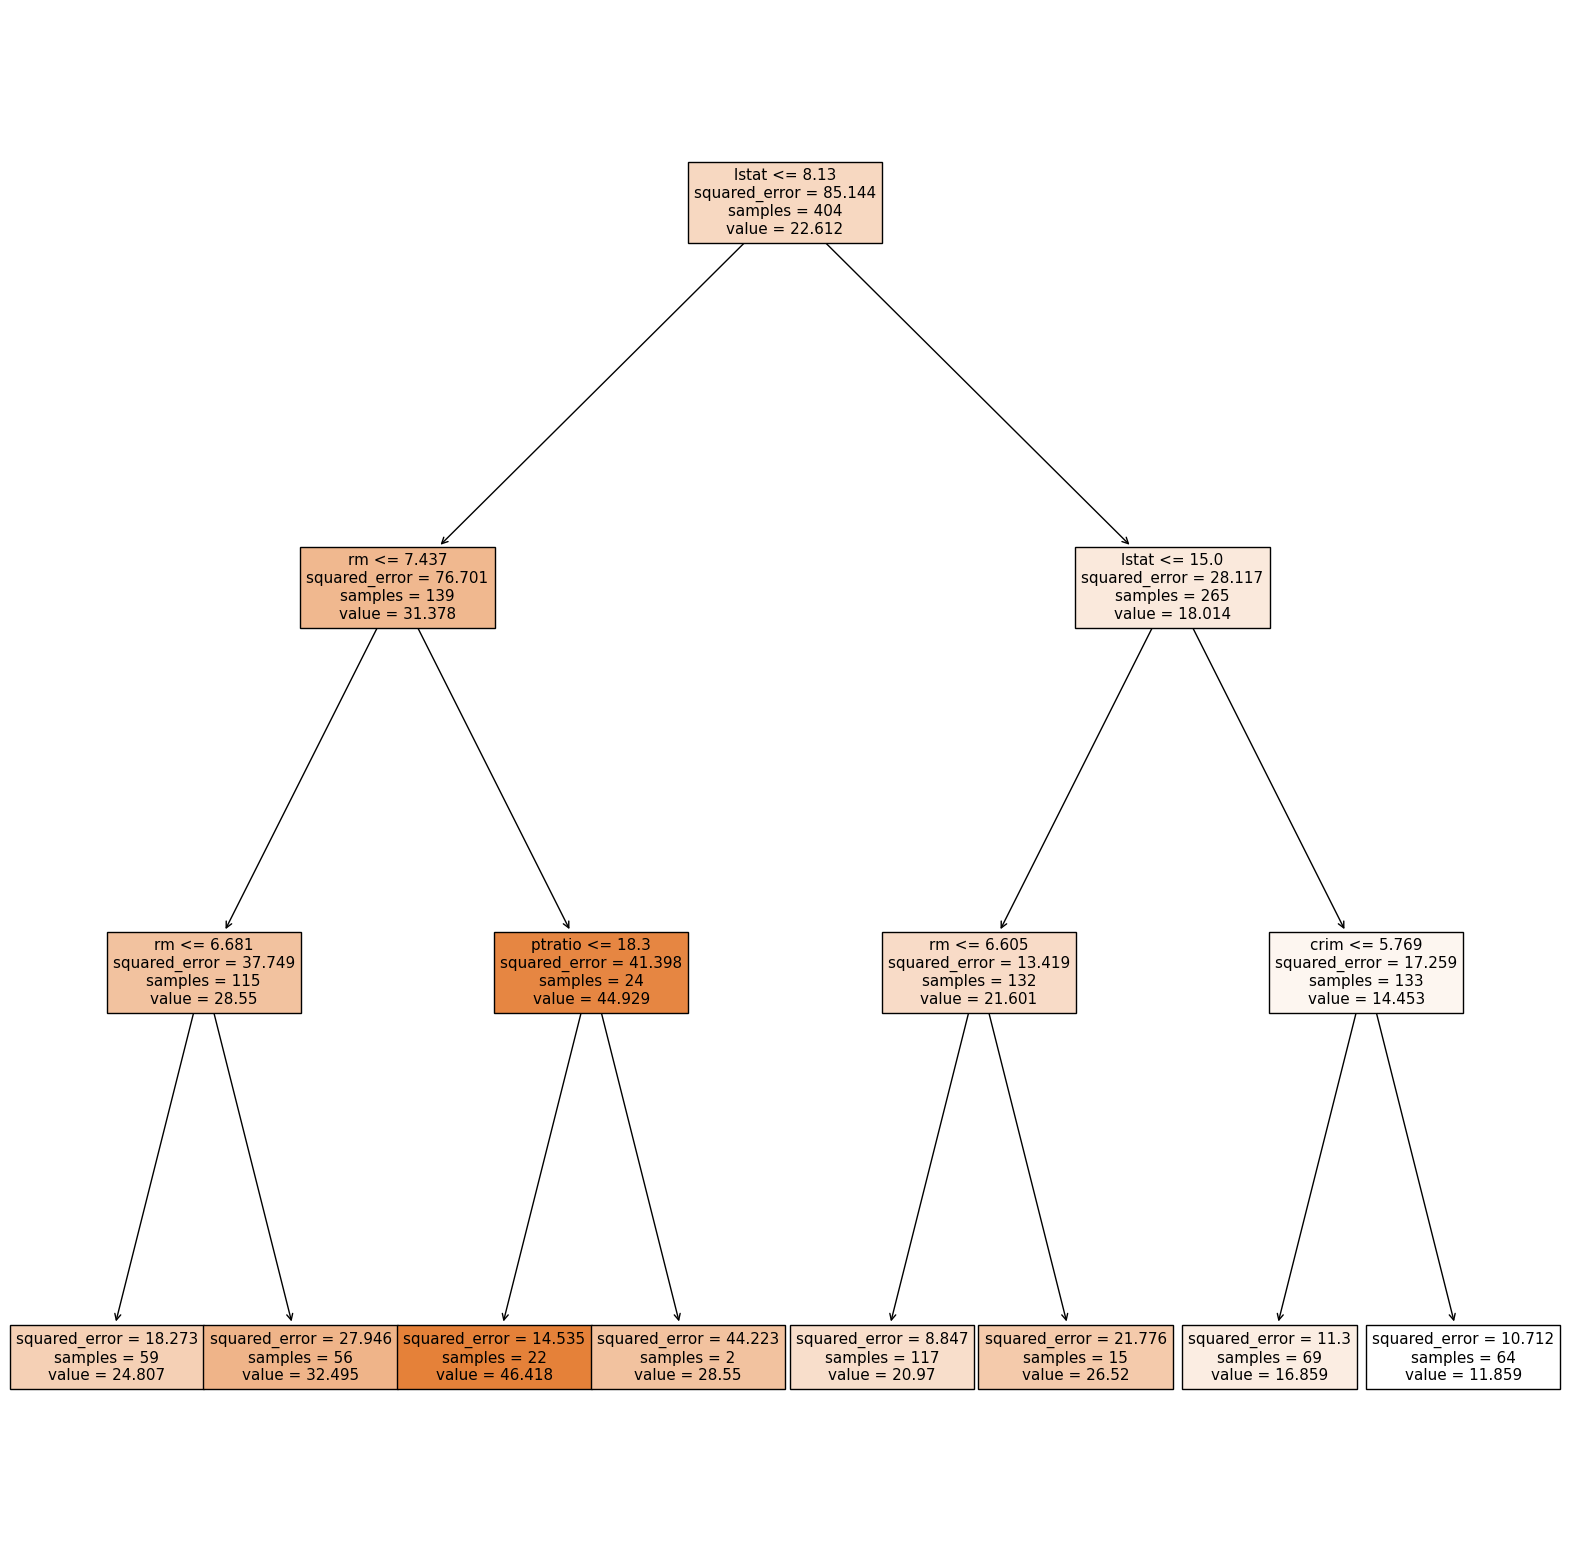

In [19]:
plt.figure(figsize=(20,20))
plot_tree(rgt,feature_names=data.columns,filled=True)
plt.show()

In [20]:
y_pred=rgt.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

5.780248099742713